In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [2]:
with open('Примеры_Лаб_2_2020/Рыбы+Птицы/р_1.txt') as f:
    n = int(f.readline())
    points = np.array([[int(i) for i in line.rstrip().split('  ')] for line in f.readlines()])
    m = points[:, 1].min()
    M = points[:, 1].max()
    points[:, 1] = M + m - points[:, 1]

In [3]:
n

924

In [4]:
points[:3]

array([[169,  62],
       [108,  83],
       [103,  81]])

The task is to estimate the perimeter and area based on the polygon boundary approximation

# 1. Construct Delaunay triangulation

In [5]:
tri = Delaunay(points)

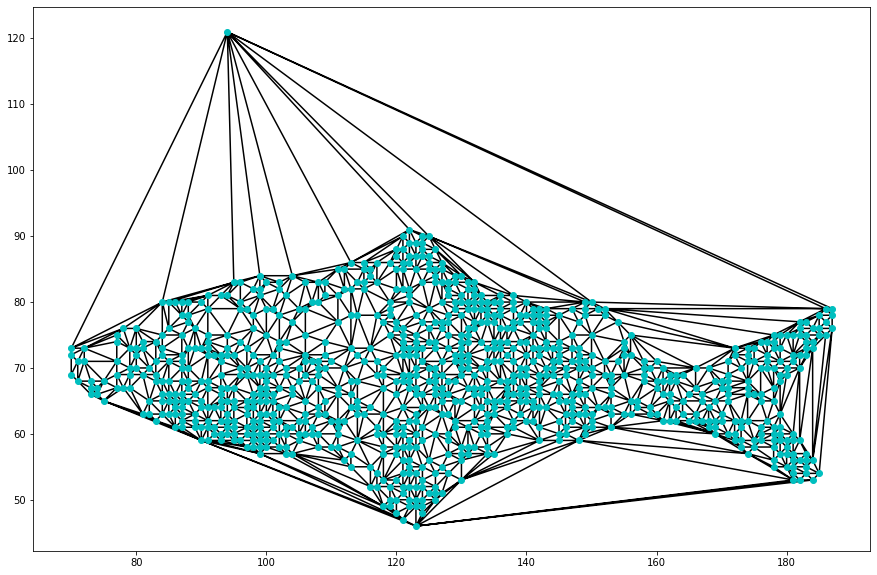

In [6]:
plt.triplot(points[:,0], points[:,1], tri.simplices, 'k-')
plt.plot(points[:,0], points[:,1], 'oc');

# 2. Cut off triangle line lens

In [7]:
line_lens_squared = np.vstack((
    ((points[tri.simplices[:, 1]] - points[tri.simplices[:, 0]]) ** 2).sum(1), 
    ((points[tri.simplices[:, 2]] - points[tri.simplices[:, 1]]) ** 2).sum(1), 
    ((points[tri.simplices[:, 0]] - points[tri.simplices[:, 2]]) ** 2).sum(1)
)).T

In [8]:
final_triangles = tri.simplices[line_lens_squared.max(1) < 50]

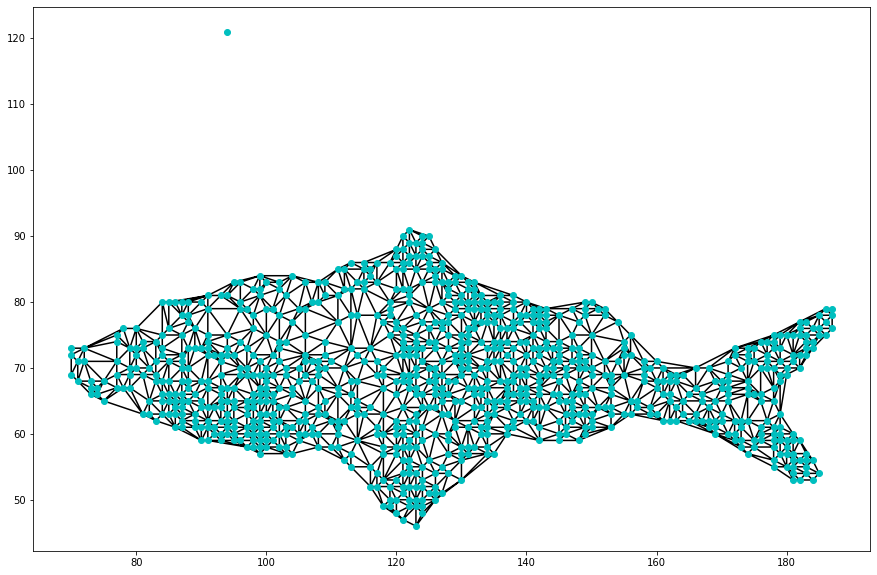

In [9]:
plt.triplot(points[:,0], points[:,1], final_triangles, 'k-')
plt.plot(points[:,0], points[:,1], 'oc');

# 3. Create hull

In [10]:
edges = np.vstack((
    np.vstack((final_triangles[:, 0], final_triangles[:, 1])).T, 
    np.vstack((final_triangles[:, 1], final_triangles[:, 2])).T, 
    np.vstack((final_triangles[:, 2], final_triangles[:, 0])).T
))

preprocessed_lines = [set((int(edge[0]), int(edge[1]))) for edge in edges]

In [11]:
hull = []

for line in preprocessed_lines:
    if preprocessed_lines.count(line) == 1:
        hull.append(list(line))

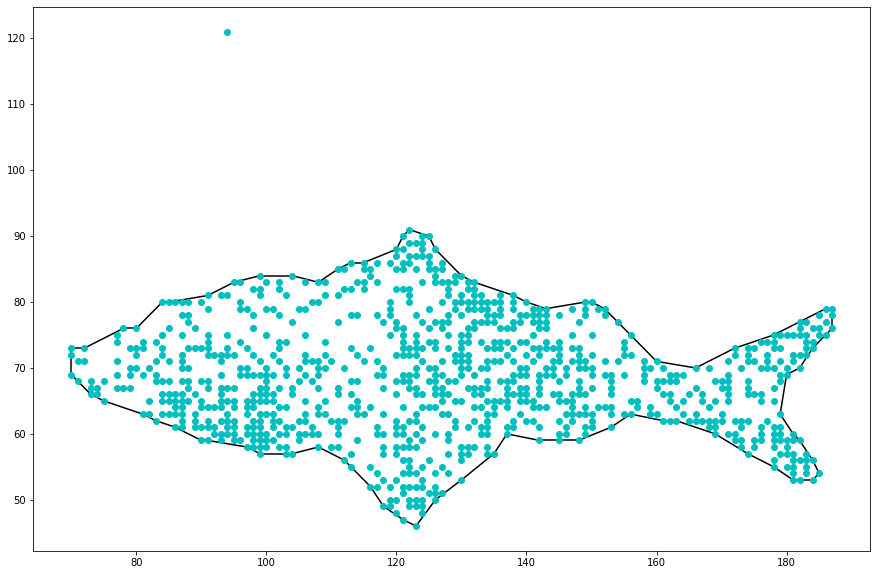

In [12]:
for point in hull:
    plt.plot(points[point, 0], points[point, 1], 'k-')

plt.plot(points[:,0], points[:,1], 'oc');

plt.savefig('outlier.png')

# 4. Get perimeter & area

In [13]:
perimeter = 0
for point in hull:
    perimeter += cdist(points[point], points[point])[1, 0]
    
print(perimeter)

299.3148226769184


In [14]:
area = 0
for (p1, p2, p3) in final_triangles:
    a = ((points[p1] - points[p2]) ** 2).sum(0) ** 0.5
    b = ((points[p2] - points[p3]) ** 2).sum(0) ** 0.5
    c = ((points[p3] - points[p1]) ** 2).sum(0) ** 0.5
    p = (a + b + c) / 2
    area += (p*(p-a)*(p-b)*(p-c)) ** 0.5
    
print(area)

2434.5
